# Pandas_dataframe
- DF = DF[DF['column'].notnull()] / DF[DF['column']>0]
- DF.isnull().sum()
- .drop_duplicates(inplace=True)
- DF['column'].value_counts()
- .goupby('column')
- .agg()

In [56]:
import pandas as pd
import numpy as np
import math

import datetime

from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

In [57]:
retail_df = pd.read_excel('C:/kyj/python/BigDataAnalysis/data/Online_Retail.xls')
retail_df.head()
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    65535 non-null  object        
 1   StockCode    65535 non-null  object        
 2   Description  65369 non-null  object        
 3   Quantity     65535 non-null  int64         
 4   InvoiceDate  65535 non-null  datetime64[ns]
 5   UnitPrice    65535 non-null  float64       
 6   CustomerID   40218 non-null  float64       
 7   Country      65535 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.0+ MB


In [58]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df.info()
print(retail_df.isnull().sum())
print(retail_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39184 entries, 0 to 65082
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    39184 non-null  object        
 1   StockCode    39184 non-null  object        
 2   Description  39184 non-null  object        
 3   Quantity     39184 non-null  int64         
 4   InvoiceDate  39184 non-null  datetime64[ns]
 5   UnitPrice    39184 non-null  float64       
 6   CustomerID   39184 non-null  int32         
 7   Country      39184 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 2.5+ MB
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(39184, 8)


In [59]:
retail_df.drop_duplicates(inplace=True)
print(retail_df.shape)

(38561, 8)


In [60]:
pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
              'Transaction':len(retail_df['InvoiceNo'].value_counts()),
              'Customer': len(retail_df['CustomerID'].value_counts())}],
            columns=['Product','Transaction','Customer'], index=['counts'])

,Product,Transaction,Customer
counts,2570,2001,1139


In [61]:
retail_df['Country'].value_counts()

United Kingdom     34465
France               957
Germany              908
EIRE                 418
Spain                353
Portugal             204
Netherlands          186
Switzerland          175
Norway               147
Australia            138
Belgium              137
Italy                110
Cyprus                98
Japan                 65
Sweden                39
Lithuania             35
Poland                33
Iceland               31
Denmark               20
Finland               17
Channel Islands       17
Austria                8
Name: Country, dtype: int64

In [62]:
retail_df['Sale_Amount'] = retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [63]:
aggregations = {'InvoiceNo':'count','Sale_Amount':'sum','InvoiceDate':'max'}
customer_df = retail_df.groupby('CustomerID')
customer_df = customer_df.agg(aggregations)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,Sale_Amount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,31,711.79,2010-12-07 14:57:00
2,12348,17,892.80,2010-12-16 19:09:00
3,12356,36,2271.62,2011-01-18 09:50:00
4,12359,16,547.50,2011-01-12 12:43:00


In [64]:
customer_df = customer_df.rename(columns={'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,Sale_Amount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,31,711.79,2010-12-07 14:57:00
2,12348,17,892.80,2010-12-16 19:09:00
3,12356,36,2271.62,2011-01-18 09:50:00
4,12359,16,547.50,2011-01-12 12:43:00


In [65]:
# 마지막 주문 후 경과일로 수정 
customer_df['ElapsedDays'] = datetime.datetime(2011,2,10) - customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,Sale_Amount,ElapsedDays
0,12346,1,77183.60,22 days 13:59:00
1,12347,31,711.79,64 days 09:03:00
2,12348,17,892.80,55 days 04:51:00
3,12356,36,2271.62,22 days 14:10:00
4,12359,16,547.50,28 days 11:17:00


In [66]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head()

,CustomerID,Freq,Sale_Amount,ElapsedDays
0,12346,1,77183.60,23
1,12347,31,711.79,65
2,12348,17,892.80,56
3,12356,36,2271.62,23
4,12359,16,547.50,29


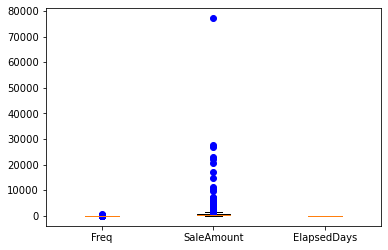

In [67]:
fig,ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['Sale_Amount'], customer_df['ElapsedDays']], sym='bo')
plt.xticks([1,2,3],['Freq', 'SaleAmount','ElapsedDays'])
plt.show()

In [68]:
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['Sale_Amount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,Sale_Amount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,23,0.693147,11.253955,3.178054
1,12347,31,711.79,65,3.465736,6.569187,4.189655
2,12348,17,892.80,56,2.890372,6.795482,4.043051
3,12356,36,2271.62,23,3.610918,7.728689,3.178054
4,12359,16,547.50,29,2.833213,6.307187,3.401197


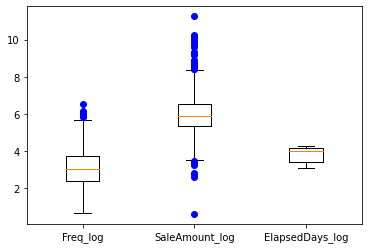

In [69]:
fig,ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1,2,3],['Freq_log', 'SaleAmount_log','ElapsedDays_log'])
plt.show()

In [70]:
X_features = customer_df[['Freq_log', 'SaleAmount_log','ElapsedDays_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

C:\developer\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


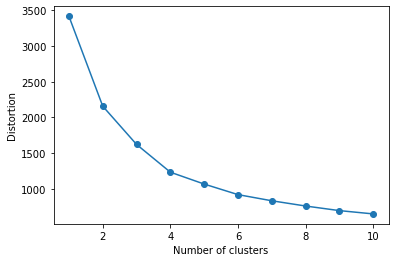

In [73]:
distortions=[]

for i in range(1,11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)
    kmeans_i.fit(X_features_scaled)
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=3, random_state=0)
Y_lables = kmeans.fit_predict(X_features_scaled)
customer_df['ClusterLabel'] = Y_lables
customer_df.head()

,CustomerID,Freq,Sale_Amount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,23,0.693147,11.253955,3.178054,0
1,12347,31,711.79,65,3.465736,6.569187,4.189655,1
2,12348,17,892.80,56,2.890372,6.795482,4.043051,1
3,12356,36,2271.62,23,3.610918,7.728689,3.178054,0
4,12359,16,547.50,29,2.833213,6.307187,3.401197,2


In [126]:
def silhouetteViz(n_cluster,X_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_lables = kmeans.fit_predict(X_features)
    silhouette_values = silhouette_samples(X_features, Y_lables, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0,0
    y_ticks=[]
    
    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_lables == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower +y_ax_upper)/2)
        y_ax_lower += len(c_silhouettes)
        
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster:'+str(n_cluster)+'\n'+'silhouette score:'+str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()   

In [110]:
def clusterScatter(n_cluster,X_features):
    c_colors=[]
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_lables = kmeans.fit_predict(X_features)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        plt.scatter(X_features[Y_lables == i,0], X_features[Y_lables == i,1], marker='o', color=c_color, edgecolor='black', s=50, label='cluster '+ str(i))
        
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = '^', color = c_colors[i], edgecolor = 'w', s = 200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

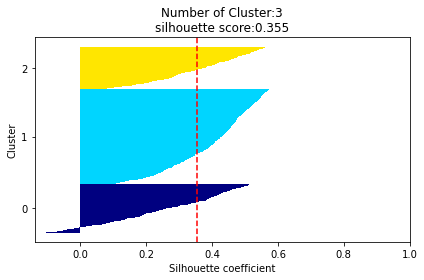

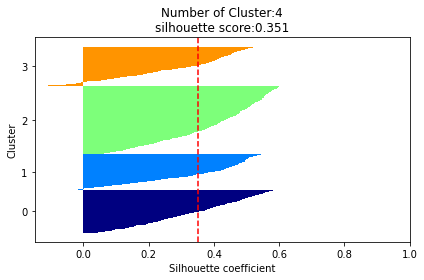

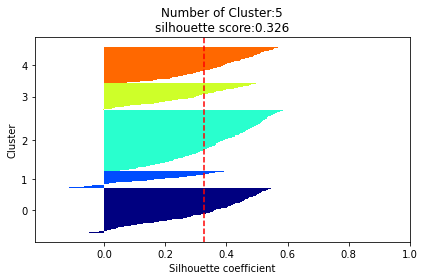

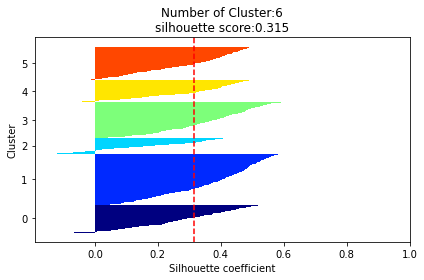

In [127]:
silhouetteViz(3,X_features_scaled)
silhouetteViz(4,X_features_scaled)
silhouetteViz(5,X_features_scaled)
silhouetteViz(6,X_features_scaled)

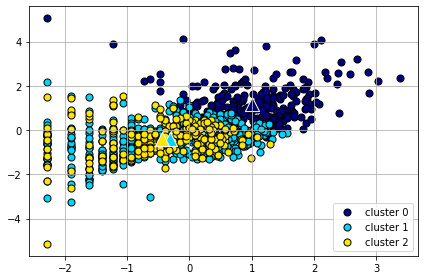

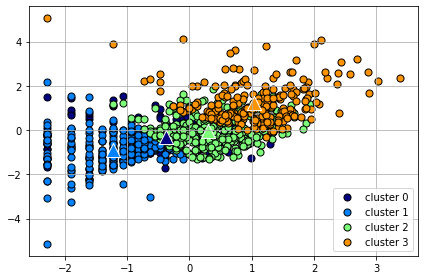

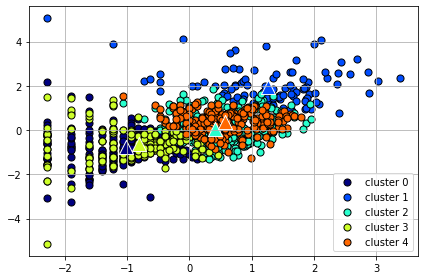

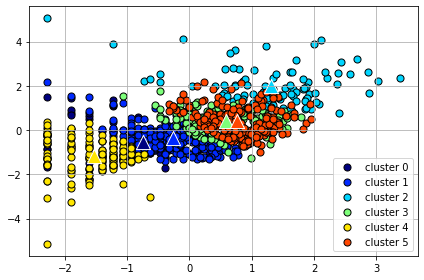

In [111]:
clusterScatter(3,X_features_scaled)
clusterScatter(4,X_features_scaled)
clusterScatter(5,X_features_scaled)
clusterScatter(6,X_features_scaled)

In [114]:
best_cluster = 4
kmeans = KMeans(n_clusters = best_cluster, random_state = 0)
Y_lables = kmeans.fit_predict(X_features_scaled)

customer_df['ClusterLabel'] = Y_lables
customer_df.head()

,CustomerID,Freq,Sale_Amount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,23,0.693147,11.253955,3.178054,3
1,12347,31,711.79,65,3.465736,6.569187,4.189655,2
2,12348,17,892.80,56,2.890372,6.795482,4.043051,2
3,12356,36,2271.62,23,3.610918,7.728689,3.178054,3
4,12359,16,547.50,29,2.833213,6.307187,3.401197,0


In [115]:
customer_df.to_csv('C:/kyj/python/BigDataAnalysis/data/Online_Retail_Customer_Cluster.csv')

In [117]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0    259
1    222
2    419
3    239
Name: CustomerID, dtype: int64

In [125]:
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log','ElapsedDays_log'],axis=1,inplace=False)
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['Sale_Amount']/customer_cluster_df['Freq']
customer_cluster_df.head()
customer_cluster_df.drop(['CustomerID'], axis=1, inplace=False).groupby('ClusterLabel').mean()

,Freq,Sale_Amount,ElapsedDays,SaleAmountAvg
ClusterLabel,,,,
0,17.204633,351.695483,29.150579,49.756738
1,6.036036,218.556892,61.563063,81.552157
2,33.424821,472.008711,61.219570,19.728287
3,78.493724,2689.003556,30.648536,388.811732
